# Деревья принятия решений

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Загрузка набора данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases)

В исходном датасете отделим первые 520 строк и в получившейся выборке определим количество пациентов, относящихся к классу 0 (пациент не болен диабетом)

In [2]:
df = pd.read_csv('diabetes.csv')
df_1 = df.loc[0:519]
num_of_zeroes = len(df_1[df_1['Outcome']==0])
print("0 response: ",num_of_zeroes)

0 response:  333


Запомним номера пациентов, для которых потом будем делать предсказания

In [3]:
PREDICT_SAMPLES = [719,734,739,748]

## Разделим полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый)

Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.

In [4]:
X = np.array(df_1.drop('Outcome',axis = 1))
y = np.array(df_1['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = 0.2, shuffle = False)

## Обучение классификатора с использованием DecisionTreeClassifier

In [5]:
clf = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes = 25,min_samples_leaf = 15,random_state = 2020)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25,
                       min_samples_leaf=15, random_state=2020)

### Глубина дерева

In [6]:
print(clf.get_depth())

8


### Cреднее значение метрик F1 (Macro-F1):

In [7]:
y_predicted = np.array(clf.predict(X_test))
F1 = metrics.f1_score(y_test,y_predicted,average='macro')
print("F1 = ",F1,"\n")

F1 =  0.759464394400487 



### Предсказания для пациентов с выбранными ранее номерами

In [8]:
df_2 = df.loc[PREDICT_SAMPLES]
X_val = np.array(df_2.drop('Outcome',axis=1))
print("predicted values: ", clf.predict(X_val))

predicted values:  [0 0 1 1]


### Визуализация дерева принятия решений

In [9]:
columns = list(df_1.drop('Outcome', axis=1).columns)
export_graphviz(clf, out_file='tree.dot',
                feature_names=columns,
                class_names=['0', '1'],
                rounded=True,
                proportion=False,
                precision=2,
                filled=True,
                label='all')

In [10]:
with open('tree.dot') as f:
    dot_graph = f.read()

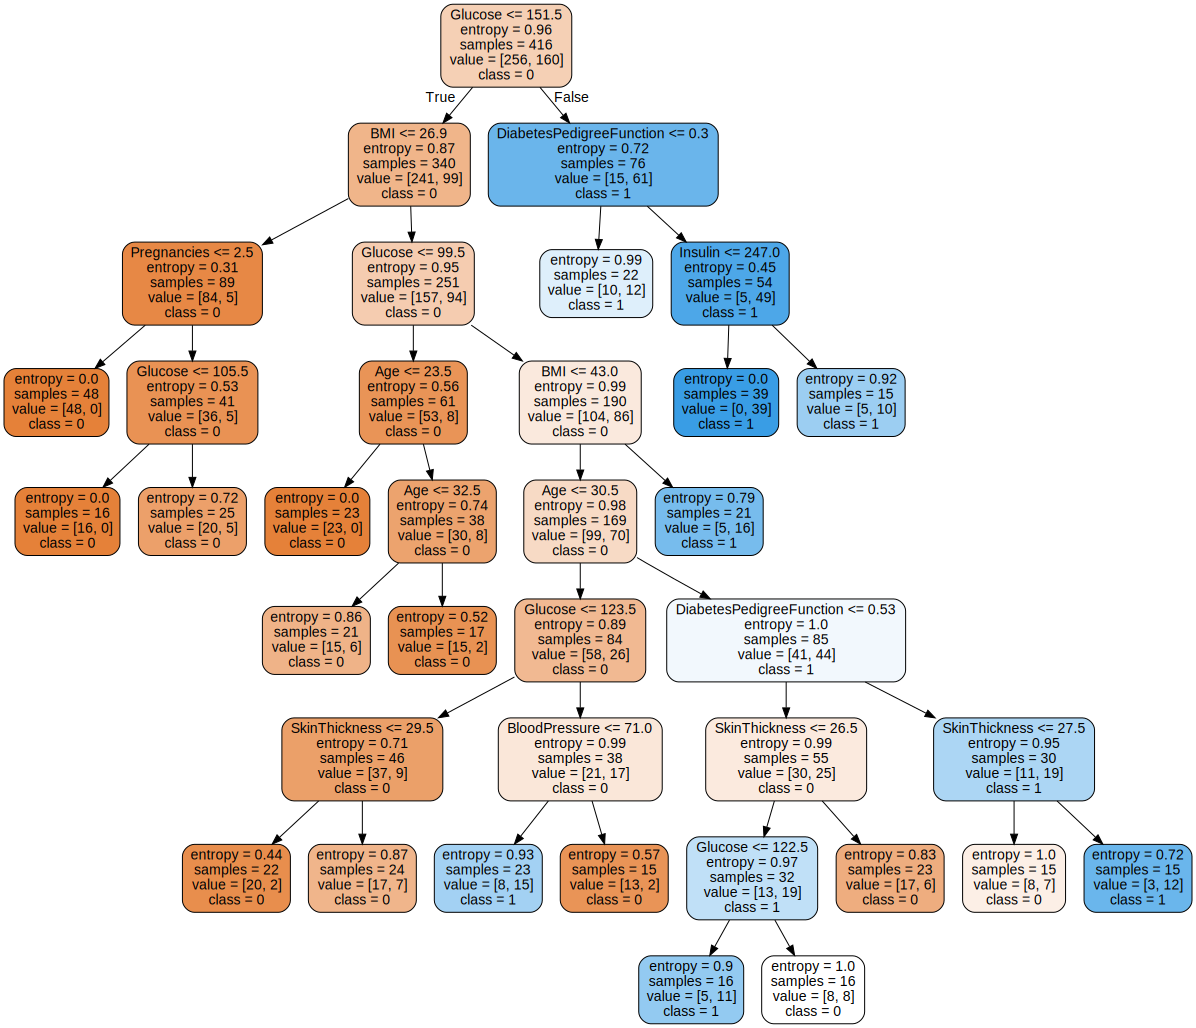

In [11]:
graphviz.Source(dot_graph)

### Доля правильных ответов

In [13]:
print(clf.score(X_test,y_test))

0.8173076923076923
